# Investigate a TMDb_Movies Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To complete this Data Analysis project I'm using TMDb movies dataset.

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as (imdb_id, revenue, budget, original_title,...etc).


#### **Question that can analyised from this data set**

 1. Movies with largest and lowest budgets.
 2. Movies with most and least earned revenue
 3. Movies with longest and shortest runtime values.
 4. Average runtime of all the movies.
 5. Year of release vs Revenue.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and suggest questions for the analysis I'll keep only relevent data and removing the unsued data. 
> .

### General Properties

In [2]:
#loading the csv file
tmdb_data = pd.read_csv('tmdb-movies.csv')

In [36]:
#printing first six rows
tmdb_data.head(6)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


## Data Cleaning

### (Removing the unused information from the dataset )¶

**Important observation regarding this process**


 1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
 2. Removing the duplicacy in the rows(if any).
 3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we     will be discarding such entries
 4. Changing release date column into date format.
 5. Replacing zero with NAN in runtime column.
 6. Changing format of budget and revenue column.


> **1. Removing Unused columns**

 **Columns that we need to delete are**  -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [37]:
# Remove unused column 
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(6)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,2015


> **2. Removing the duplicacy in the rows(if any).**
>
>Lets see how many entries I have in the database

In [38]:
# Reduce the count of rows.
rows, col = tmdb_data.shape
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 10 no.of columns in it.


> Now removing the duplicate rows if any!

In [39]:
# Removing the duplicate rows
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape
print('There are now {} total entries of movies and {} columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 10 columns in it.


> So I have only one duplicate row and I already move it.

>**3. Removing 0's from budget and the revenue columns**

In [40]:
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


> **4. Changing the release date column into standard date format**

In [41]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [42]:
# printing the changed dataset
tmdb_data.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


>**5. Replacing zero with NAN in runtime column.**


In [43]:
# Replacing 0's with NaN of runtime column 
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

>**6. Changing format of budget and revenue column.**

In [44]:
# Printing the data type of the dataset
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [45]:
change_type=['budget', 'revenue']

#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)

# Printing the data after changed
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

> Checking the current format of columns in the dataset

In [46]:
#printing the data type of the data set
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [47]:
change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1  : Movies with largest and lowest budgets

In [48]:
import pprint
#defining the function
def calculate(column):
    #for highest budget
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest budget
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

In [49]:
#calling the function
calculate("budget")

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


> as showen above the highset budget is (The Warrior's Way) movie and the lowest is (Lost & Found) movie.

### Research Question 2 : Movies with most and least earned revenue

In [50]:
# Calling the function
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


> as showen above the largest revenue earned is (Avatar) movie and the lowest is (Shattered Glass) movie.

### Research Question 3 : Movies with longest and shortest runtime

In [51]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


> Column with id 2107 shows the longest runtime. While column with id 5162 shows the shortest runtime.

### Research Question 4 : Average runtime of the movies

In [52]:
# defining a function to find average of a column
def avg_fun(column):
    return tmdb_data[column].mean()

In [53]:
#calling above function
avg_fun('runtime')

109.22029060716139

> The average runtime of a movie is 109 minutes.

> Now, I will show graphic that appear the result above that the average movie runtime is 109 min.

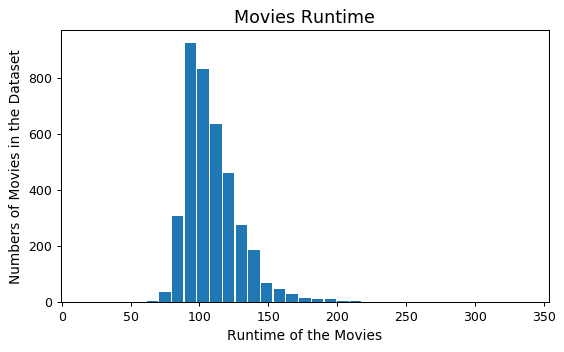

In [54]:
#printing a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(7,4), dpi = 90)

#Name of the histogram
plt.title('Movies Runtime', fontsize=14)
#x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 11)
#y-axis 
plt.ylabel('Numbers of Movies in the Dataset', fontsize=11)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

> As shown in above histogram most of the movies are timed between 80 to 130 minutes.

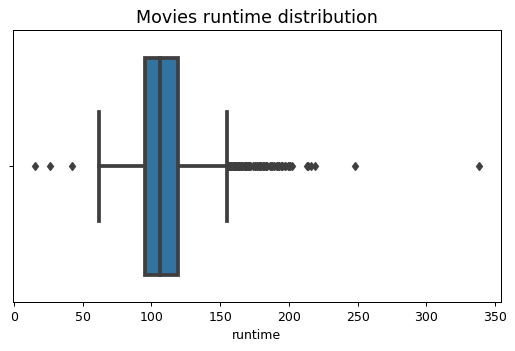

In [55]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(7,4), dpi = 90)

#using seaborn
sns.boxplot(tmdb_data['runtime'], linewidth = 3)
#Name of the histogram
plt.title('Movies runtime distribution', fontsize=14)

#diplaying the plot
plt.show()

> Above box plot gives us an overall idea of how is the distribution in movies runtime.

### Research Question 5 : Year of release vs Revenue

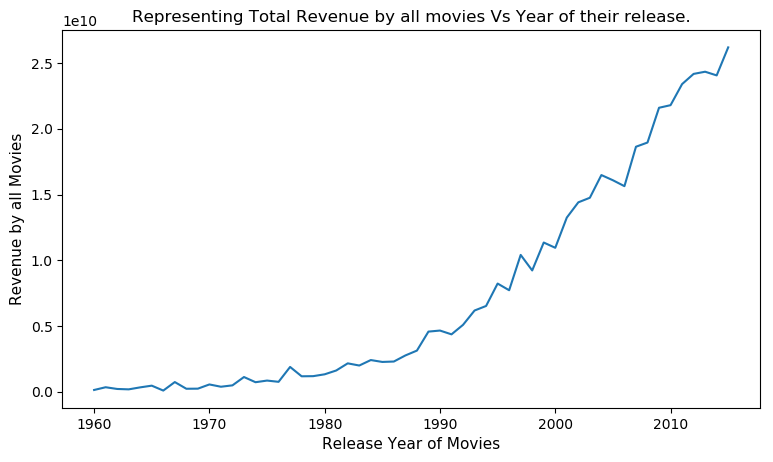

In [56]:
#We will be using Line plot for this analysis

year_revenue = tmdb_data.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 11)
#on y-axis
plt.ylabel('Revenue by all Movies', fontsize = 11)
#title of the line plot
plt.title('Representing Total Revenue by all movies Vs Year of their release.')

#plotting the graph
plt.plot(year_revenue)

#displaying the line plot
plt.show()

In [57]:
#To find that which year made the highest profit?
year_revenue.idxmax()

2015

> So I can conclude my graphics analysis, this graphic and calculation shows that year 2015 was the year where movies made the highest profit.

<a id='conclusions'></a>
## Conclusions


**The data was very interesting to me, and after I finished with this analysis I found some facts about movies:

> 1. The runtime of Carlos movie is 338 while the runtime of Kid's Story is 15.
> 2. Average duration of the movie is 109 minutes. 
> 3. Year 2015 was the year where movies made the highest profit.
> 4. As shown that the (Avatar) movie was the largest revenue(237000000).
> 5. As appear (The Warrior's Way) movie was the highest budget(425000000).


**The dataset have a limitation in some areas:

> 1. The dataset doesn't contain the producing countries, so we cannot know what is the favorite movies. Also,     
     where they were made in order to identify which countries have the best and worst rated movies.
> 2. The currency in budget and revenue doesn't specify.

**Finally, after did all of these analysis Thank you and I hope you enjoy reading this report.
